In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# Introduction  

This is a Case Study for the company Bellabeats. Bellabeat makes stylish, wearable technology that inspires a healthy lifestyle by monitoring heart rates and activity of their users. In this case study I will try to help the marketing team at Bellabeat identify insights on when people get active, how and when people wear monitoring devices, and any interesting correlations. To do this, I will analyze an open data set from Fitbit's fitabase.

From case study file: 

> Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

## I will try to answer the questions: 

* When do wearable tech users get active? 
* When do wearable tech users wear their devices? 
* Are there any other interesting insights in the data? 

# Preparing the Data 

## Collecting
I'm going to read the sleep, weight, hourly intensity, heart rate, and steps CSV's.

In [2]:
sleep_day <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hourly_intensity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
heart_rate <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
hourly_steps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

## Cleaning & Sorting 

Next, I'm going to mutate and select the data to make it easier to work with then show the structure of the tables 

In [3]:
#sleep data 
sleep <- 
    sleep_day %>% 
        mutate(id=as.character(Id)) %>%
        mutate(date=mdy_hms(SleepDay)) %>%
        mutate(sleep=TotalMinutesAsleep) %>%
        mutate(bed=TotalTimeInBed) %>%
        select(
        id,date,sleep,bed
        )

#intensity data 
intensity <- 
    hourly_intensity %>% 
        mutate(id=as.character(Id)) %>%
        mutate(date=mdy_hms(ActivityHour)) %>%
        mutate(total_intensity=TotalIntensity) %>%
        mutate(average_intensity=AverageIntensity) %>%
        select(
        id,date,total_intensity,average_intensity
        )

#heart data 
heart <- 
    heart_rate %>% 
        mutate(id=as.character(Id)) %>%
        mutate(date=mdy_hms(Time)) %>%
        mutate(rate=Value) %>%
        select(
        id,date,rate
        )

#steps data 
steps <- 
    hourly_steps %>% 
        mutate(id=as.character(Id)) %>%
        mutate(date=mdy_hms(ActivityHour)) %>%
        mutate(steps=StepTotal) %>%
        select(
        id,date,steps

        )

In [4]:
# structure of steps table
str(steps)

'data.frame':	22099 obs. of  3 variables:
 $ id   : chr  "1503960366" "1503960366" "1503960366" "1503960366" ...
 $ date : POSIXct, format: "2016-04-12 00:00:00" "2016-04-12 01:00:00" ...
 $ steps: int  373 160 151 0 0 0 0 0 250 1864 ...


In [5]:
# structure of heart rate table
str(heart)

'data.frame':	2483658 obs. of  3 variables:
 $ id  : chr  "2022484408" "2022484408" "2022484408" "2022484408" ...
 $ date: POSIXct, format: "2016-04-12 07:21:00" "2016-04-12 07:21:05" ...
 $ rate: int  97 102 105 103 101 95 91 93 94 93 ...


In [6]:
# structure of intensity table
str(intensity)

'data.frame':	22099 obs. of  4 variables:
 $ id               : chr  "1503960366" "1503960366" "1503960366" "1503960366" ...
 $ date             : POSIXct, format: "2016-04-12 00:00:00" "2016-04-12 01:00:00" ...
 $ total_intensity  : int  20 8 7 0 0 0 0 0 13 30 ...
 $ average_intensity: num  0.333 0.133 0.117 0 0 ...


Now, we can start exploring the data. I initia 

# Analysis 

# Identify High Activity Times

To begin exploring the data, I'll count the number of participants in each table.  

In [7]:
# count of participants in each table 
n_distinct(steps$id)
n_distinct(intensity$id)
n_distinct(heart$id)

[1] 33

[1] 33

[1] 14

The steps and intensity tables have 33 unique ID's but heart only as 14. 

Now, I'll summarize each table.

In [8]:
# summary of steps
    summary(steps)

      id                 date                         steps        
 Length:22099       Min.   :2016-04-12 00:00:00   Min.   :    0.0  
 Class :character   1st Qu.:2016-04-19 01:00:00   1st Qu.:    0.0  
 Mode  :character   Median :2016-04-26 06:00:00   Median :   40.0  
                    Mean   :2016-04-26 11:46:42   Mean   :  320.2  
                    3rd Qu.:2016-05-03 19:00:00   3rd Qu.:  357.0  
                    Max.   :2016-05-12 15:00:00   Max.   :10554.0  

In [9]:
# summary of heart
    summary(heart)

      id                 date                          rate       
 Length:2483658     Min.   :2016-04-12 00:00:00   Min.   : 36.00  
 Class :character   1st Qu.:2016-04-19 06:18:10   1st Qu.: 63.00  
 Mode  :character   Median :2016-04-26 20:28:50   Median : 73.00  
                    Mean   :2016-04-26 19:43:52   Mean   : 77.33  
                    3rd Qu.:2016-05-04 08:00:20   3rd Qu.: 88.00  
                    Max.   :2016-05-12 16:20:00   Max.   :203.00  

In [10]:
# summary of intensity
    summary(intensity)

      id                 date                     total_intensity 
 Length:22099       Min.   :2016-04-12 00:00:00   Min.   :  0.00  
 Class :character   1st Qu.:2016-04-19 01:00:00   1st Qu.:  0.00  
 Mode  :character   Median :2016-04-26 06:00:00   Median :  3.00  
                    Mean   :2016-04-26 11:46:42   Mean   : 12.04  
                    3rd Qu.:2016-05-03 19:00:00   3rd Qu.: 16.00  
                    Max.   :2016-05-12 15:00:00   Max.   :180.00  
 average_intensity
 Min.   :0.0000   
 1st Qu.:0.0000   
 Median :0.0500   
 Mean   :0.2006   
 3rd Qu.:0.2667   
 Max.   :3.0000   

# Hourly Intensity, Steps, & Heart Rate 

I'm going to find the average number of steps, heart rate, and intensity per hour. Then I'll merge the data. Then visualize the number of steps as column hieght and average intensity as brightness of color to identify highly active hours in the day. 

In [11]:
# summarizing for hourly analysis 

# heart 
hourly_heart <- heart %>%
    mutate(hour = hour(date)) %>%
    group_by(id, hour) %>%
    summarize(
    heart_rate = mean(rate),
    .groups = 'drop'
    )

# steps
hourly_steps <- steps %>%
    mutate(hour = hour(date)) %>%
    group_by(id, hour) %>%
    summarize(
    steps = mean(steps),
    .groups = 'drop'
    )

# intensity
hourly_intensity <- intensity %>%
    mutate(hour = hour(date)) %>%
    group_by(id, hour) %>%
    summarize(
    intensity = mean(total_intensity),
    .groups = 'drop'
    )

# merging the data 

hourly_merge_1 <- merge(hourly_heart,hourly_steps)
hourly_data <- merge(hourly_merge_1,hourly_intensity)

# summarising the merged data - finding averages by hour

hourly_mean <- hourly_data %>%
    group_by(hour) %>% 
    summarize(
    steps = mean(steps),
    int = mean(intensity)
    )

hourly_steps_intensity <- arrange(hourly_data,-intensity)

# arranging highest intensity hours
highest_intensity_hours <- arrange(hourly_mean,-int)

# plotting the data 
p_hourly_steps_intensity <- ggplot(hourly_mean, aes(x=hour,fill=int)) +
    geom_col(aes(y=steps)) +
    #facet_wrap(~id) +
    theme_classic()

In [12]:
head(highest_intensity_hours)

hour,steps,int
<int>,<dbl>,<dbl>
18,660.1724,24.27971
17,608.6461,22.76260
12,603.0484,21.60360
10,547.3905,21.23662
16,603.6913,20.84055
19,497.7112,20.59730


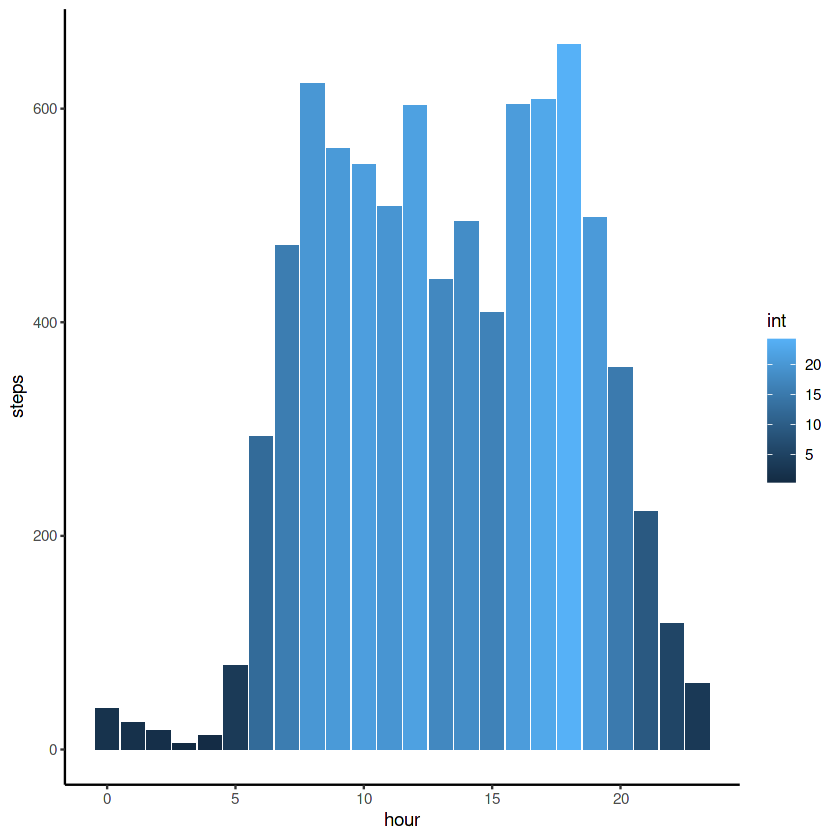

In [13]:
p_hourly_steps_intensity

In the chart above, the height of each column represents steps and the brightness of the color represents the intensity of the activity. Large bright spikes are high intenisty hours with many steps, likely runs or workouts. You can see that there are three significant spikes through the day at 10am, noon, and 6pm. 

# Daily Intensity, Steps, & Heart Rate 

I'll do the same by day of week. First summarizing the data by day and finding the mean heart rate, steps, and intensity. Again, I'll merge the data and visualise the results. 

In [14]:
# summarizing for day of week analysis 

# heart 
wday_heart <- heart %>%
    mutate(wday = wday(date)) %>%
    group_by(id, wday) %>%
    summarize(
    heart_rate = mean(rate),
    .groups = 'drop'
    )

# steps
wday_steps <- steps %>%
    mutate(wday = wday(date)) %>%
    group_by(id, wday) %>%
    summarize(
    steps = mean(steps),
    .groups = 'drop'
    )

# intensity
wday_intensity <- intensity %>%
    mutate(wday = wday(date)) %>%
    group_by(id, wday) %>%
    summarize(
    intensity = mean(total_intensity),
    .groups = 'drop'
    )

# merging the data 

wday_merge_1 <- merge(wday_heart,wday_steps)
wday_data <- merge(wday_merge_1,wday_intensity)

# summarising the merged data - finding averages by hour

wday_mean <- wday_data %>%
    group_by(wday) %>% 
    summarize(
    steps = mean(steps),
    int = mean(intensity)
    )

# plotting the data 

p_daily_steps_intensity <- ggplot(wday_mean, aes(x=wday,fill=int)) +
    geom_col(aes(y=steps)) +
    theme_classic()

# arranging highest intensity hours
highest_intensity_wday <- arrange(wday_mean,-int)

In [15]:
highest_intensity_wday

wday,steps,int
<dbl>,<dbl>,<dbl>
7,382.4120,14.56760
6,356.1023,13.63969
3,353.5456,13.28413
5,359.9695,13.14322
2,340.7790,12.63999
4,339.7196,12.61271
1,276.0201,11.39335


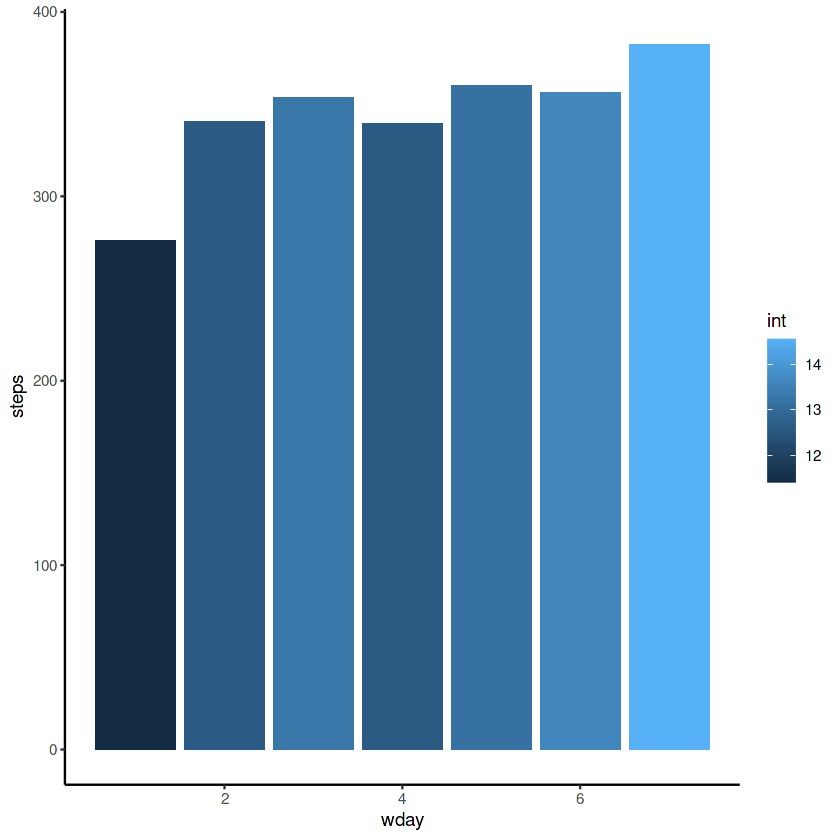

In [16]:
p_daily_steps_intensity

Once again, we can see that the participants have specific days of the week with more steps and more intensity. Sunday stands out as a high intensity activity day. 

## Hour of Week Intensity, Steps, & Heart Rate 

To find highly active hours of days of the week, I'll seperate the date column to days and hours, and again summarise the data so show us the mean of steps and intensity of the hour of each day of the week. Then I'll merge the data. To visualize this, I'll list the top 5 higherst intensity hours. I will also plot the steps as columns, intensity as color, through the hours in a day and facet that by day of week.

In [17]:
# summarizing for day of week and hour analysis 

# steps
wday_h_steps <- steps %>%
    separate(date, c("date", "time"), sep=" ") %>%
    mutate(wday = wday(date)) %>%
    group_by(wday, time) %>%
    summarize(steps = mean(steps))
    .groups = "drop"

# steps
wday_h_intensity <- intensity %>%
    separate(date, c("date", "time"), sep=" ") %>%
    mutate(wday = wday(date)) %>%
    group_by(wday, time) %>%
    summarize(intensity = mean(total_intensity))
    .groups = "drop"

# merging day and time steps and intensity data 
wday_h_data <- merge(wday_h_steps, wday_h_intensity)

# summarizing and visualizing our key finding regarding hour of day of week steps and intensity 

intensity_peaks <- wday_h_data %>%
    group_by(wday,time) %>%
    summarize(max_intensity = max(intensity)) %>%
    arrange(-max_intensity)

# plot the data 

p_wday_h_steps_intensity <- ggplot(wday_h_data) +
    geom_col(aes(x=time, y=steps, fill=intensity)) +
    facet_wrap(~wday) +

    theme_classic() +
    theme(axis.text.x = element_text(size = 4, angle=90)) +

    annotate("text", x = "12:00:00", y = 800, label = "Noon")+
    annotate("text", x = "19:00:00", y = 800, label = "7pm")+
    annotate("text", x = "05:00:00", y = 800, label = "5am")+

    labs(
        title="High Intensity Activity",
        subtitle="Hourly Steps by Day of Week (1 = Monday etc.)"
        )

`summarise()` has grouped output by 'wday'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'wday'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'wday'. You can override using the `.groups` argument.



In [18]:
head(intensity_peaks,5)

wday,time,max_intensity
<dbl>,<chr>,<dbl>
7,13:00:00,29.35537
4,17:00:00,26.14286
4,18:00:00,25.23129
7,12:00:00,24.22314
2,18:00:00,23.82203


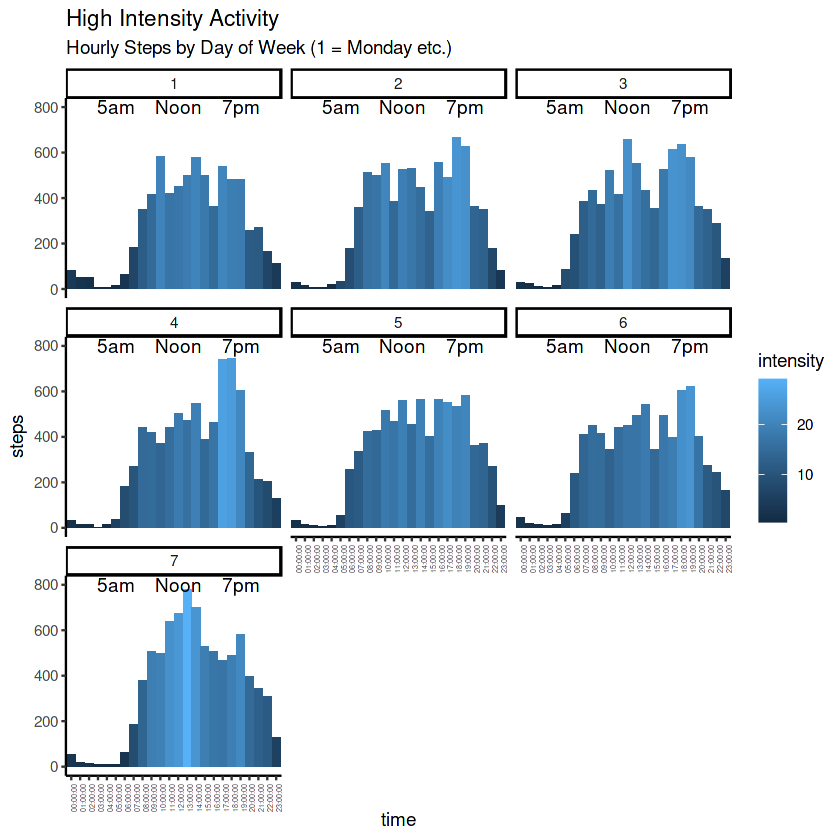

In [19]:
p_wday_h_steps_intensity

As you can see in the table and chart above, Thursday evening and Sunday early afternoon are both high intensity high step times in the week.  

# Identify High & Low Use Times

I want to see if the participants kept their wearbale technology on their person 24 hours per day, and if not, when did they put them on and take them off. I'll try to uncover some insights by analysing the hear rate data. 

I'll start the wearability analysis by summarising the heart rate table.

In [20]:
summary(heart)

      id                 date                          rate       
 Length:2483658     Min.   :2016-04-12 00:00:00   Min.   : 36.00  
 Class :character   1st Qu.:2016-04-19 06:18:10   1st Qu.: 63.00  
 Mode  :character   Median :2016-04-26 20:28:50   Median : 73.00  
                    Mean   :2016-04-26 19:43:52   Mean   : 77.33  
                    3rd Qu.:2016-05-04 08:00:20   3rd Qu.: 88.00  
                    Max.   :2016-05-12 16:20:00   Max.   :203.00  

There are no measurements of 0 in the heart rate data. If the device is removed from the user, it will not take a reading. By counting the heart rate readings at different days or hours, we can identify times when users wear or do not wear the device. 

# Hourly Heart Rate Readings  

I'm going count the number of readings per hour and visualize the results.

In [21]:
# counting hourly heart rate readings 
hourly_count_1 <- heart %>%
    group_by(id) %>%
    mutate(hour = hour(date))
hourly_count <- count(hourly_count_1,hour)%>%
    arrange(id,hour)

# summarising hourly totals 
total_hourly_count <- hourly_count %>%
    group_by(hour) %>%
    summarise(
    total = sum(n),
    )

# plotting the heart rate readings 
hourly_heart_rate_readings <- ggplot(hourly_count,aes(x=hour, y=id, size=n, alpha=n)) +
    geom_point() +
    theme_classic()

# sorting the results 
highest_hour_reading_count <-
    head(arrange(total_hourly_count, -total),5)

lowest_hour_reading_count <- 
    head(arrange(total_hourly_count,total),5)

# plotting the results
p_hourly_heart_rate_readings <- ggplot(total_hourly_count,(aes(x=hour,y=total))) +
    geom_col(fill="deepskyblue3") 

In [22]:
highest_hour_reading_count

hour,total
<int>,<int>
12,137686
16,135530
18,134100
17,132714
14,131598


In [23]:
lowest_hour_reading_count

hour,total
<int>,<int>
4,62029
2,63754
3,63922
5,64497
1,66444


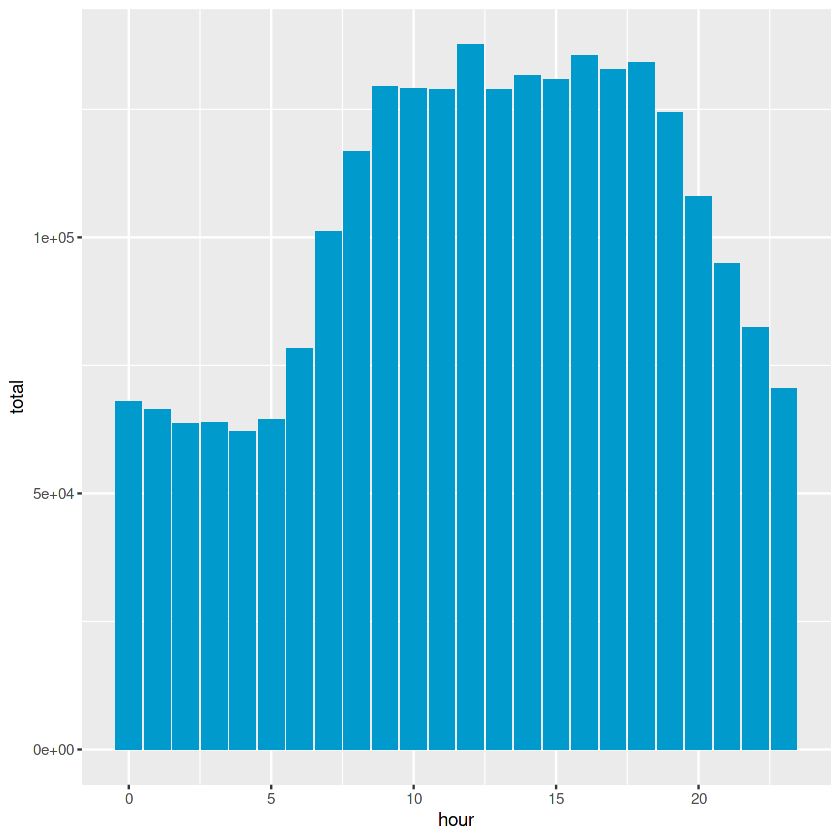

In [24]:
p_hourly_heart_rate_readings

In the plot above, you can see the count of readings in each hour. The columns hight represents the number of readings in each hour in the day. You can see that the hours with the lowest readings are in the early morning and the hours with the highest number of readings is in the afternoon and early evening. 

# Daily Heart Rate Readings 

I'll perform the same analysis on days of the week. Again, I'll count the heart rate readings by day of week. Then, visualise the data in a column chart. 

In [25]:
wday_count_1 <- heart %>%
    group_by(id) %>%
    mutate(wday = wday(date))
wday_count <- count(wday_count_1,wday)%>%
    arrange(id,wday)

daily_heart_rate_readings <- ggplot(wday_count,aes(x=wday,y=id, size=n,alpha=n)) +
    geom_point() +
    theme_classic()

# summarising daily totals 
total_daily_count <- wday_count %>%
    group_by(wday) %>%
    summarise(
    total = sum(n)
    )

# plotting the heart rate readings 
wday_heart_rate_readings <- ggplot(total_daily_count,aes(x=wday, y=total)) +
    geom_col(fill="deepskyblue3") +
    theme_classic()

#sorting results 
highest_wday_reading_count <-
    head(arrange(total_daily_count,-total),5)

lowest_wday_reading_count <- 
    head(arrange(total_daily_count,total),5)


In [26]:
highest_wday_reading_count

wday,total
<dbl>,<int>
3,452381
4,399232
5,359146
6,357594
7,338394


In [27]:
lowest_wday_reading_count

wday,total
<dbl>,<int>
1,287147
2,289764
7,338394
6,357594
5,359146


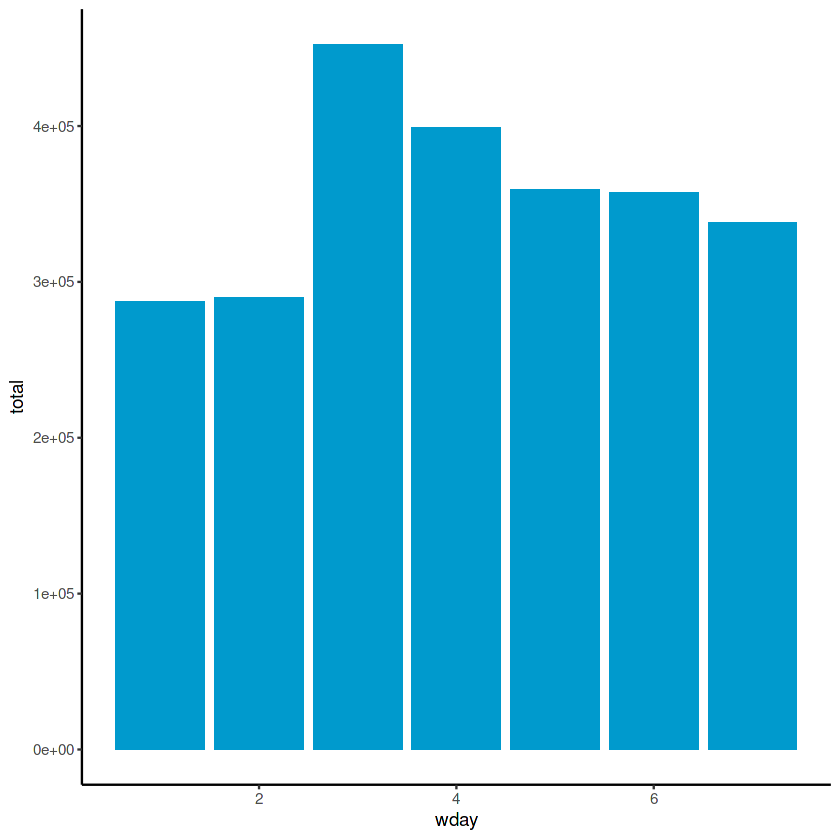

In [28]:
wday_heart_rate_readings

In this chart, the x axis is days of the week, 1 is Monday, 2 is Tuesday etc. As you can see, there is a spike on Wednesday. Let's explore hours of the week to get a closer look.  

# Hour of Week Heart Rate Readings 

To do this, I'll seperate the date to day of week and hour. Then count the readings by id in each hour of the week.

In [29]:
# seperate date and time 
wday_h_heart_1 <- heart %>%
    separate(date, c("date", "time"), sep=" ")
# mutate date to day of the week and time to hours 
wday_h_heart_2 <- wday_h_heart_1%>% 
    group_by(id) %>%
    mutate(wday = wday(date)) %>%
    mutate(hour = hms(time)) %>%
    mutate(h = hour(hour)) 

# count instances in each hour of week 
wday_h_heart_3 <- count(wday_h_heart_2,wday,h) 

# summarize the count by day and hour without id
wday_h_total_count <- wday_h_heart_3 %>%
    group_by(wday,h) %>%
    summarise(
        total=sum(n)
        )

# sort by highest and lowest 
wday_h_highest_count <- head(arrange(wday_h_total_count, -total),10)
wday_h_lowest_count <- head(arrange(wday_h_total_count, total),10)



`summarise()` has grouped output by 'wday'. You can override using the `.groups` argument.



In [30]:
wday_h_highest_count

wday,h,total
<dbl>,<dbl>,<int>
3,12,26457
3,16,26021
3,15,24229
3,17,23872
3,11,23605
3,10,23356
4,18,22898
4,17,22722
3,14,22718


In [31]:
wday_h_lowest_count

wday,h,total
<dbl>,<dbl>,<int>
2,2,5184
2,3,5230
2,1,5446
2,0,5529
2,4,5543
1,23,6058
2,5,6478
7,5,7505
7,4,7637


In [32]:
# plot results 
p_wday_h_total_counts <- 
    ggplot(wday_h_total_count, aes(x=h, y=total)) + 
        geom_col(fill="deepskyblue3") +
        facet_wrap(~wday) +

    theme_classic() +

    labs(
        title="Wearbability by Hour of Week",
        subtitle="Hourly Heart Rate Readings by Day of Week (1 = Monday etc.)"
        )

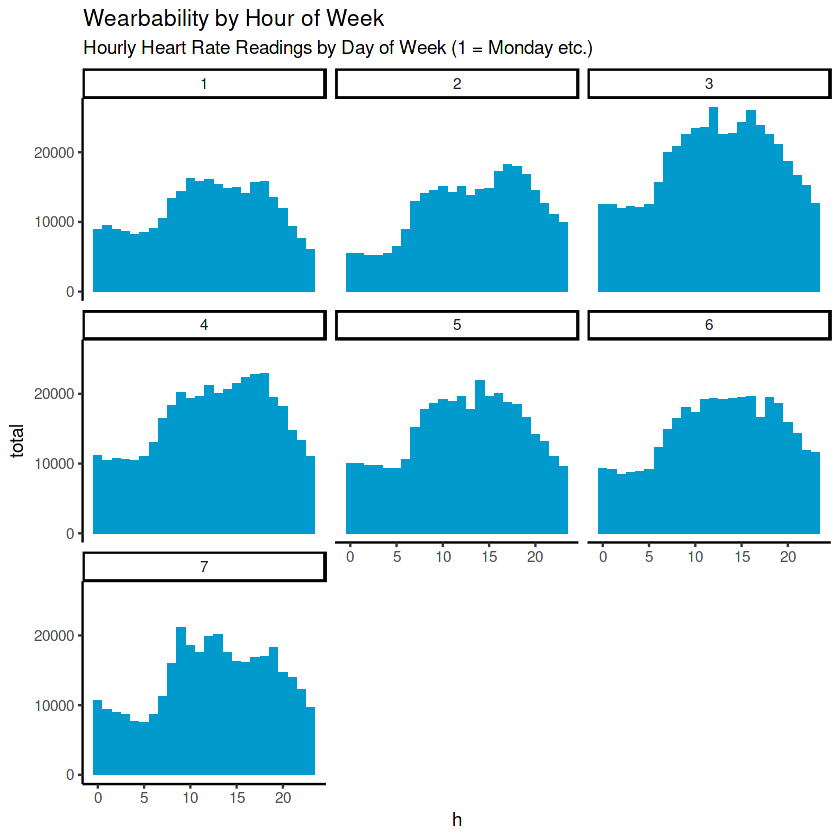

In [33]:
p_wday_h_total_counts

Here you can see the peaks and valleys of hours of the week with the total number of heart rate readings. The valleys are likely times people are not wearing their device, and the peaks are times most people are wearing their device. Wednesday afternoon and Thursday afternoon stand out as high wearability times. Early mornings and evenings are low wearability times. 

Now I'll find the sum of readings in each hour of the week, find the hours with the highest and lowest readings in the week. Finally, I'll plot the data. 

In [34]:
p_wday_h_heart_readings <- ggplot(wday_h_total_count,(aes(x=h, y=wday, size=total, color=total)))+
    geom_point() +
    scale_y_reverse()+
    annotate("text", x = 4, y = 1.75, label = "Tuesday, 4am", color = "red")+
    annotate("text", x = 5, y = 6.75, label = "Sunday, 5am", color = "red")+
    annotate("text", x = 13, y = 2.75, label = "Wednesday afternoon")+
    annotate("text", x = 17, y = 3.75, label = "Thursday, 5pm")+
    #facet_wrap(~id) +
    theme_classic()+
    labs(
        title="Heart Rate Readings per Hour per Day", 
        subtitle="Number of heart rate readings by hour of day of week")

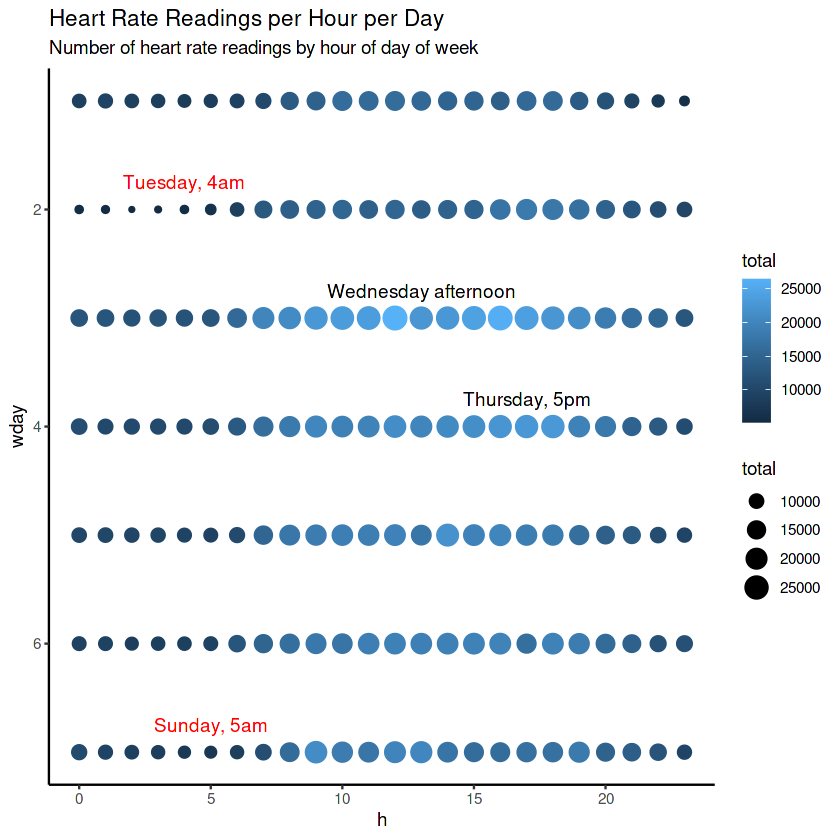

In [35]:
p_wday_h_heart_readings

The above chart shows the number of readings in each hour of the week, small dark dots represent a low number of readings, large bright blue dots represent a high number of readings in an hour. Days of the week are listed numerically starting on Monday as the y axis. The x axis plots the hours in a day. 

You can see that early mornings, specifically Tuesday, Wednesday, and Sunday have the lowest number of readings. These are likely times people prefer to take their device off. 

Thursday evening and Sunday at noon have the highest number of readings in the week.

# Findings & Recommendations 

## Spikes in Activity  
### Thursdays and Sundays are high activity days with peaks midweek around dinner time 

As you will see in the following chart, there is a regular peak from Tuesday to Thursday in high intensity activity around 7pm. But the highest activity is on Sundays, specifically, Sunday at 1pm.

I recommend we target our advertising to insipre fitness after work and on Sunday mornings through the afternoon. 

## No Constant Wearability 
### Participants don't love wearing the tech 24/7 

By measuring the number of heart rate readings we recorded every hour, we identified times people are most and least wearing their monitors. Wednesday afternoons, Thursday evenings, and Sudays around noon had the highest levels of heart rate recording, therefore the most popular times to wear the monitor. 

I recommend considering looking deeper into this finding and considering how this might affect the marketing communication regarding the product and its capabilities. For example, if users don't want to wear it to bed, monitoring sleep might not be important to them.  

## Possible Correlation 
### People might like wearing their tech for high intensity activities 

Acording to the above findings, I believe there might be a strong correlation between users wearing their tech and when they perform high intensity activities. We require more analysis, but if true, users might prefer to only wear their devices to monitor specific activities, like running or working out. 

# Thank You 

Thanks for reading my case study. Feedback is more than welcome. If you are a Google Data Analysis student, I hope you found some insights or inspiration in this markdown. 